## 1. Define Customer Personality Analysis Objectives


### Problem Statement:

Customer Personality Analysis is crucial for businesses aiming to optimize their products and marketing strategies. The objective is to gain a deep understanding of the diverse customer base, allowing for tailored product modifications and targeted marketing efforts. By identifying specific needs, behaviors, and concerns within different customer segments, businesses can allocate resources more effectively.

### The primary goals of Customer Personality Analysis are twofold:

1. **Understanding Customer Sentiment:**
       - Analyze and interpret customer attitudes towards the product based on their expressed opinions. This involves extracting insights from what customers say about the product, including reviews, feedback, and sentiment expressed in various channels.

2. **Observing Customer Behavior:**
       - Investigate and understand customer actions to uncover patterns and preferences. This focuses on deciphering what customers are actually doing rather than relying solely on what they say. Behavioral analysis provides valuable insights into customer engagement and purchasing habits.


## 2. Collect Relevant Customer Data Sources


## 3. Clean and Preprocess Customer Data


# Attribute

### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
---

### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
---

### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
---

### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
---

### Target

- Need to perform clustering to summarize customer segments.

# Questions
1. **What are the distinct customer segments based on demographic factors?**
   - Use clustering algorithms to identify groups of customers with similar characteristics such as age, education, marital status, and income.
---
2. **How do spending patterns vary across different customer segments?**
   - Analyze the distribution of spending on various product categories (wines, fruits, meat, etc.) among different customer segments.
---
3. **Are there correlations between the number of children/teenagers at home and spending behavior?**
   - Explore whether customers with different family structures exhibit distinct spending patterns.
---
4. **What is the relationship between the recency of the last purchase and customer complaints?**
   - Investigate if customers who complain more frequently tend to make purchases more recently.
---
5. **Do customers who accept promotional offers show similar preferences in product categories?**
   - Examine the product preferences of customers who accepted different promotional campaigns.
---
6. **How does the number of web visits relate to the number of web purchases and overall spending?**
   - Investigate the connection between online engagement (web visits) and customer behavior (web purchases, overall spending).
---
7. **Are there specific characteristics shared by customers who accepted the offer in the last campaign?**
   - Analyze demographic, behavioral, and spending characteristics of customers who responded positively to the latest campaign.
---
8. **Do customers who made purchases with a discount show common traits or preferences?**
   - Explore the demographic and spending patterns of customers who frequently take advantage of promotional discounts.
---
9. **How does the acceptance of earlier campaigns influence the response to the latest campaign?**
   - Investigate if customers who accepted previous campaigns are more likely to respond positively to the latest campaign.
---
10. **What are the key features that differentiate the clusters of customers identified through the clustering process?**
    - Examine the importance of different features in distinguishing customer segments, providing insights into what defines each group.
---

In [2]:
import pandas as pd

df = pd.read_csv('raw_data.csv')

In [3]:
people_data = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Dt_Customer', 'Recency','Complain','Response']]
Products_data = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','Response']]
Place_data =  df[[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Response']]
Promotion_data = df[['NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response']]

## Explore Customer Behavior Patterns Through Visualization


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.select_dtypes(include='object').describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


## Univarint analysis

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame containing numerical data

# Create subplots
fig = make_subplots(rows=len(df.select_dtypes(include='number').columns), cols=2, subplot_titles=[])

row_num = 1
for i, column in enumerate(df.select_dtypes(include='number').columns):
    # Add histogram trace
    hist_trace = go.Histogram(x=df[column], nbinsx=20, opacity=0.75, showlegend=False)
    fig.add_trace(hist_trace, row=row_num, col=1)

    # Add box plot trace
    box_trace = go.Box(y=df[column], boxpoints='all', jitter=0.3, pointpos=-1.8, showlegend=False)
    fig.add_trace(box_trace, row=row_num, col=2)

    # Update subplot titles
    fig.update_layout(annotations=[dict(text=f"{column} Histogram", x=0.17, xref="paper", y=1.0, yref="paper",
                                         showarrow=False, font=dict(size=12)),
                                   dict(text=f"{column} Box Plot", x=0.82, xref="paper", y=1.0, yref="paper",
                                         showarrow=False, font=dict(size=12))])

    row_num += 1

# Update layout
fig.update_layout(title='Univariate Plots for Numerical Data', showlegend=False, height=400 * len(df.select_dtypes(include='number').columns))

# Show the figure
fig.show()


In [15]:
import plotly.express as px

# Assuming 'df' is your DataFrame containing categorical data

# Univariate plots for categorical columns
figs_categorical = []

for column in df.select_dtypes(include='object').columns[:-1]:
    # Create a bar chart using Plotly Express
    fig = px.bar(people_data[column].value_counts().reset_index(),
             x='count',
             y=f'{column}',
             labels={'index': 'Education Level', f'{column}': 'Count'},
             title='Distribution of Education Levels')

    fig.show()


In [20]:
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [22]:
#Typecasting the data

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


## Enhance Analysis Through Feature Engineering


1. **Age:**
   - Calculate the age of each customer based on the 'Year_Birth' column.

2. **Total Amount Spent on Products:**
   - Sum the amounts spent on different product categories ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds') to create a new feature representing the total amount spent on products.

3. **Total Number of Purchases:**
   - Sum the number of purchases made through different channels ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases') to create a new feature representing the total number of purchases.

4. **Response to Campaigns:**
   - Calculate the total number of accepted campaigns by summing 'AcceptedCmp1' through 'AcceptedCmp5' and 'Response'. This can indicate a customer's responsiveness to marketing campaigns.

5. **Web Engagement Ratio:**
   - Calculate the ratio of web visits to the number of web purchases to understand the effectiveness of the online platform for each customer.

6. **Family Size:**
   - Create a new feature representing the total number of people in the customer's household by summing 'Kidhome' and 'Teenhome'.

7. **Income per Household Member:**
   - Divide the yearly household income ('Income') by the family size to get the income per household member.

8. **Recency in Months:**
   - Convert the 'Recency' feature (number of days since the last purchase) into months to standardize the time unit.

9. **Customer Loyalty:**
   - Create a feature representing customer loyalty based on the number of complaints ('Complain'). A lower number of complaints may indicate higher loyalty.

10. **Time Since Enrollment:**
    - Calculate the number of days since the customer's enrollment ('Dt_Customer') to understand the longevity of the customer relationship.

11. **Campaign Responsiveness:**
    - Create a feature representing the overall responsiveness to campaigns, considering all campaigns ('AcceptedCmp1' through 'AcceptedCmp5' and 'Response').

12. **Interaction with Promotions:**
    - Sum the number of deals purchases ('NumDealsPurchases') with the number of accepted campaigns to understand the overall interaction with promotions.


In [23]:
df['Month'] = df['Dt_Customer'].dt.month # Creating a month column
df.drop('ID',axis=1,inplace=True) # Droping the ID Column
df['Income'] = df['Income'].astype('int') # Typecasting the data 

In [33]:
df['Age'] = 2024 - df['Year_Birth'] # Creating a Age Column

In [40]:
# Total Amount Spent on Products 

# Sum the amounts spent on different product categories 
# ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds') 
# to create a new feature representing the total amount spent on products.

df['TotalAmountSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [41]:
# Total Number of Purchases:

# Sum the number of purchases made through different channels 
# ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases') 
# to create a new feature representing the total number of purchases.

df['TotalPurchasesMade'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [43]:
# Response to Campaigns:

# Calculate the total number of accepted campaigns 
# by summing 'AcceptedCmp1' through 'AcceptedCmp5' and 'Response'. 
# This can indicate a customer's responsiveness to marketing campaigns.

# Assuming 'df' is your DataFrame
df['TotalAcceptedCampaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)



In [46]:
import numpy as np
# Web Engagement Ratio:

# Calculate the ratio of web visits to the number of web purchases to understand 
# the effectiveness of the online platform for each customer.

# Assuming 'df' is your DataFrame
df['WebEngagementRatio'] = df['NumWebVisitsMonth'] / df['NumWebPurchases']

# Handling potential division by zero, replace NaN or Inf values with 0
df['WebEngagementRatio'] = df['WebEngagementRatio'].replace([np.inf, -np.inf, np.nan], 0)



In [47]:
# Family Size:

# Create a new feature representing the total number of people in the 
# customer's household by summing 'Kidhome' and 'Teenhome'.

# Assuming 'df' is your DataFrame
df['FamilySize'] = df['Kidhome'] + df['Teenhome']


In [48]:
# Income per Household Member:

# Assuming 'df' is your DataFrame
df['IncomePerMember'] = df['Income'] / (df['FamilySize'] + 1)  # Adding 1 to include the customer
# This code creates a new column 'IncomePerMember', representing the income per household member by dividing the yearly household income ('Income') by the family size.

In [49]:
# Recency in Months:

# Assuming 'df' is your DataFrame
df['RecencyMonths'] = df['Recency'] / 30.44  # Assuming an average month has 30.44 days
# This code creates a new column 'RecencyMonths', converting the 'Recency' feature (number of days since the last purchase) into months.

In [50]:
# Customer Loyalty:

# Assuming 'df' is your DataFrame
df['CustomerLoyalty'] = 1 - df['Complain']  # 1 if no complaint, 0 if complaint
# This code creates a new column 'CustomerLoyalty', where 1 indicates higher loyalty (no complaint) and 0 indicates lower loyalty (complaint).



In [51]:
# Time Since Enrollment:

# Assuming 'df' is your DataFrame
from datetime import datetime

current_date = datetime.now()
df['TimeSinceEnrollment'] = (current_date - pd.to_datetime(df['Dt_Customer'])).dt.days
# This code calculates the number of days since the customer's enrollment ('Dt_Customer') to understand the longevity of the customer relationship.


In [52]:

# Campaign Responsiveness:

# Assuming 'df' is your DataFrame
df['TotalAcceptedCampaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
# This code creates a new column 'TotalAcceptedCampaigns', representing the overall responsiveness to campaigns by summing 'AcceptedCmp1' through 'AcceptedCmp5' and 'Response'.



In [53]:
# Interaction with Promotions:

df['InteractionWithPromotions'] = df['NumDealsPurchases'] + df['TotalAcceptedCampaigns']
# This code creates a new column 'InteractionWithPromotions', summing the number of deals purchases ('NumDealsPurchases') with the number of accepted campaigns to understand the overall interaction with promotions.

In [55]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Month', 'Age', 'TotalAmountSpent', 'TotalPurchasesMade',
       'TotalAcceptedCampaigns', 'WebEngagementRatio', 'FamilySize',
       'IncomePerMember', 'RecencyMonths', 'CustomerLoyalty',
       'TimeSinceEnrollment', 'InteractionWithPromotions'],
      dtype='object')

## Transform Data to Prepare for Modeling


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year_Birth                 2240 non-null   int64         
 1   Education                  2240 non-null   object        
 2   Marital_Status             2240 non-null   object        
 3   Income                     2240 non-null   int32         
 4   Kidhome                    2240 non-null   int64         
 5   Teenhome                   2240 non-null   int64         
 6   Dt_Customer                2240 non-null   datetime64[ns]
 7   Recency                    2240 non-null   int64         
 8   MntWines                   2240 non-null   int64         
 9   MntFruits                  2240 non-null   int64         
 10  MntMeatProducts            2240 non-null   int64         
 11  MntFishProducts            2240 non-null   int64         
 12  MntSwe

## Encoding the data 

In [71]:
edu_list = list(df['Education'].unique())

education_dict = {deg:i for i,deg in enumerate(edu_list)}

df['Education'] = df['Education'].map(education_dict)

In [73]:
marital_list = list(df['Marital_Status'].unique())

marital_dict = {mat:i for i,mat in enumerate(marital_list)}

df['Marital_Status'] = df['Marital_Status'].map(marital_dict)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year_Birth                 2240 non-null   int64         
 1   Education                  2240 non-null   int64         
 2   Marital_Status             2240 non-null   int64         
 3   Income                     2240 non-null   int32         
 4   Kidhome                    2240 non-null   int64         
 5   Teenhome                   2240 non-null   int64         
 6   Dt_Customer                2240 non-null   datetime64[ns]
 7   Recency                    2240 non-null   int64         
 8   MntWines                   2240 non-null   int64         
 9   MntFruits                  2240 non-null   int64         
 10  MntMeatProducts            2240 non-null   int64         
 11  MntFishProducts            2240 non-null   int64         
 12  MntSwe

In [76]:
## Save the data for data analysis

# df.to_csv('DATA_FOR_ANALYSIS.csv',index=False)

In [77]:
## Final data for data analysis

preprocessed_data = df.drop('Dt_Customer',axis=1)

## Select Suitable Models for Customer Personality Analysis


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

def cluster_and_plot(df,features, method='KMeans', num_clusters=3, use_scaler=False):
    # Extracting selected features
    X = df[features]

    # Use StandardScaler if specified
    if use_scaler:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X

    # Apply clustering method
    if method == 'KMeans':
        cluster_model = KMeans(n_clusters=num_clusters, random_state=42)
    elif method == 'Agglomerative':
        cluster_model = AgglomerativeClustering(n_clusters=num_clusters)
    elif method == 'DBSCAN':
        cluster_model = DBSCAN(eps=0.5, min_samples=5)
    else:
        raise ValueError("Invalid clustering method. Choose 'KMeans', 'Agglomerative', or 'DBSCAN'.")

    df['Cluster'] = cluster_model.fit_predict(X_scaled)

    # Evaluate clustering with silhouette score (ignore for DBSCAN)
    if method != 'DBSCAN':
        silhouette = silhouette_score(X_scaled, df['Cluster'])
        print(f"Silhouette Score ({method}): {silhouette}")
    else:
        silhouette = None

    # Visualize clustering results (for 2D data)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k')
    plt.title(f'{method} Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1] if len(features) > 1 else '')
    plt.show()

    return silhouette




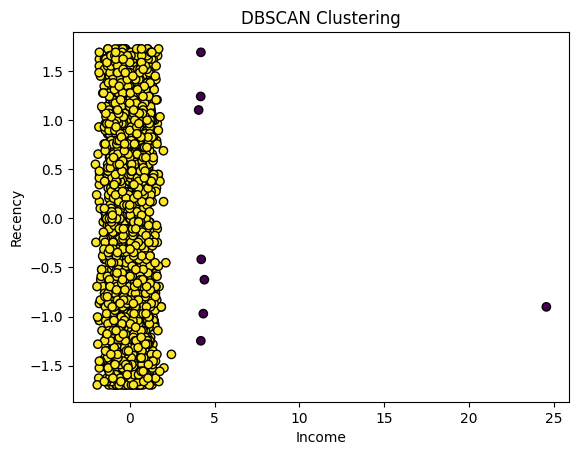

In [91]:
# Example usage:
features_list = ['Income', 'Recency']
silhouette_score = cluster_and_plot(preprocessed_data,features_list, method='DBSCAN', num_clusters=3, use_scaler=True)

## Train Models Using Customer Data


## Evaluate Model Performance on Testing Set


## Fine-Tune Model Parameters for Improved Accuracy


## Interpret Customer Behavior Insights from Model Results


## Create Visualizations to Communicate Findings


## Deploy Models for Production Use (if applicable)


## Monitor and Maintain Model Performance


## Document the Entire Customer Personality Analysis Process